# Tarea: Análisis Visual de Ventas de Tienda de Conveniencia

### **Equipo:** Nicolás Corral
### **Grupo:** 65
### **Curso:** Visualización de Datos en Python

## Descripción del Caso

Una cadena de tiendas de conveniencia quiere analizar sus ventas y el comportamiento de los clientes para mejorar su estrategia de marketing. Para ello, han recopilado un conjunto de datos que incluye información sobre las ventas, los productos y los clientes. Su misión será usar las técnicas de visualización de datos aprendidas para analizar y presentar los resultados de este conjunto de datos.

## Indicaciones Generales

1.  **Dataset:** Utilizarán el dataset "Supermarket Sales" disponible en Kaggle (data.csv).
2.  **Entorno:** Trabajen según las indicaciones de este notebook.
3.  **Colaboración:** Esta es una tarea grupal. Asegúrense de coordinar el trabajo.
4.  **Streamlit:** Se requiere crear un dashboard interactivo usando la librería Streamlit. Deberán escribir y ejecutar su código como script the python (archivo .py), pero deben también escribir el código en una celda dentro de éste jupyter notebook para su revisión.
5.  **Pensamiento Crítico:** Incluyan reflexiones y justificaciones para sus elecciones de visualización y análisis.
6.  **Entrega:** Entreguen este notebook completado según las indicaciones.

## 1. Selección de Variables y desarrollo de Análisis


a.  Examinen el conjunto de datos proporcionado (`df.info()`, `df.describe()`, `df.columns`).

b.  Identifiquen y **justifiquen** las variables que consideren más relevantes para un análisis significativo del comportamiento de ventas y clientes.

c.  Reflexionen sobre la importancia de cada variable seleccionada en el contexto del caso de estudio (¿Qué preguntas de negocio pueden ayudar a responder?).

## Análisis Requeridos:

1.  **Evolución de las Ventas Totales:**
    *   **Objetivo:** Mostrar cómo han variado las ventas totales (`Total`) a lo largo del tiempo (`Date`).

2.  **Ingresos por Línea de Producto:**
    *   **Objetivo:** Comparar los ingresos (`Total`) generados por cada `Product line`.

3.  **Distribución de la Calificación de Clientes:**
    *   **Objetivo:** Analizar la distribución de las calificaciones (`Rating`) de los clientes.

4.  **Comparación del Gasto por Tipo de Cliente:**
    *   **Objetivo:** Comparar la distribución del gasto total (`Total`) entre clientes `Member` y `Normal`.

5.  **Relación entre Costo y Ganancia Bruta:**
    *   **Objetivo:** Visualizar la relación entre el costo de bienes vendidos (`cogs`) y el ingreso bruto (`gross income`).

6.  **Métodos de Pago Preferidos:**
    *   **Objetivo:** Identificar los métodos de pago (`Payment`) más frecuentes.

7.  **Análisis de Correlación Numérica:**
    *   **Objetivo:** Explorar relaciones lineales entre variables numéricas (`Unit price`, `Quantity`, `Tax 5%`, `Total`, `cogs`, `gross income`, `Rating`).

8.  **Composición del Ingreso Bruto por Sucursal y Línea de Producto:**
    *   **Objetivo:** Mostrar la contribución de cada `Product line` al `gross income` dentro de cada `Branch`.

---

## Requisitos Adicionales:
*   Implementación en Streamlit.
*   Gráficos claros (títulos, etiquetas).
*   Interactividad (filtros) donde sea apropiado.
*   Aplicación de buenas prácticas de visualización (claridad).

In [ ]:
# Cargar librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style='whitegrid')

# Cargar el archivo CSV
df = pd.read_csv('data.csv')  # Asegúrate que el archivo esté en la misma carpeta que el notebook

# Convertir la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])


## Análisis 1: Evolución de las Ventas Totales

**Objetivo:** Mostrar cómo han variado las ventas totales a lo largo del tiempo.

Este gráfico de líneas permite visualizar el comportamiento diario de las ventas, ayudando a identificar tendencias, fluctuaciones o posibles estacionalidades. Un análisis de este tipo es clave para decisiones estratégicas como promociones o ajustes de inventario.


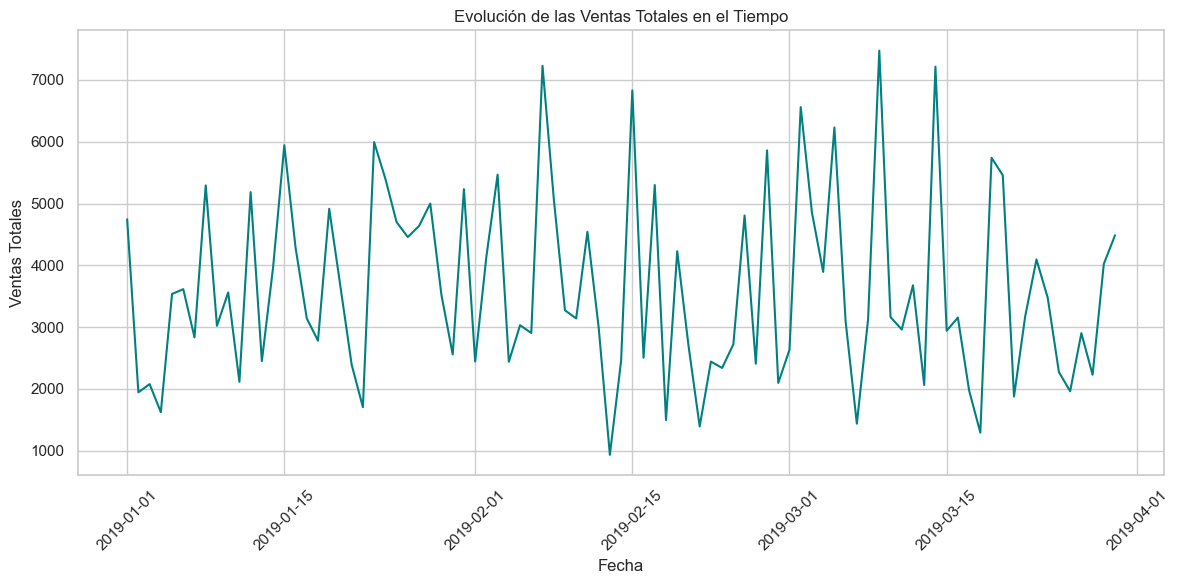

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar las ventas totales por fecha
ventas_diarias = df.groupby('Date')['Total'].sum()

# Visualización
plt.figure(figsize=(12, 6))
sns.lineplot(x=ventas_diarias.index, y=ventas_diarias.values, color='teal')
plt.title('Evolución de las Ventas Totales en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Análisis 2: Ingresos por Línea de Producto

**Objetivo:** Comparar los ingresos generados por cada línea de producto.

Este gráfico permite identificar cuáles son las líneas de producto que generan mayores ventas totales. Esta información es útil para focalizar estrategias comerciales, promociones o decisiones de stock en aquellas categorías más rentables.


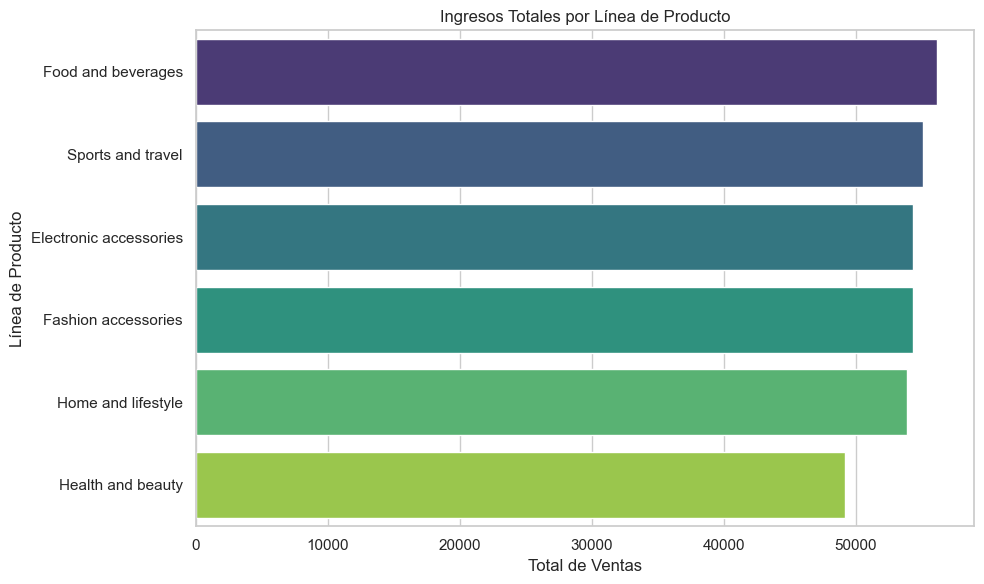

In [ ]:
# Agrupar por línea de producto y calcular total de ingresos
ingresos_por_producto = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=ingresos_por_producto.values, y=ingresos_por_producto.index, palette='viridis')
plt.title('Ingresos Totales por Línea de Producto')
plt.xlabel('Total de Ventas')
plt.ylabel('Línea de Producto')
plt.tight_layout()
plt.show()


## Análisis 3: Distribución de la Calificación de Clientes

**Objetivo:** Analizar la distribución de las calificaciones (`Rating`) otorgadas por los clientes.

Este histograma permite visualizar cómo se distribuyen las valoraciones de los clientes. Identificar si existen concentraciones altas o bajas puede ayudar a evaluar la percepción general del servicio y detectar oportunidades de mejora en la experiencia del cliente.


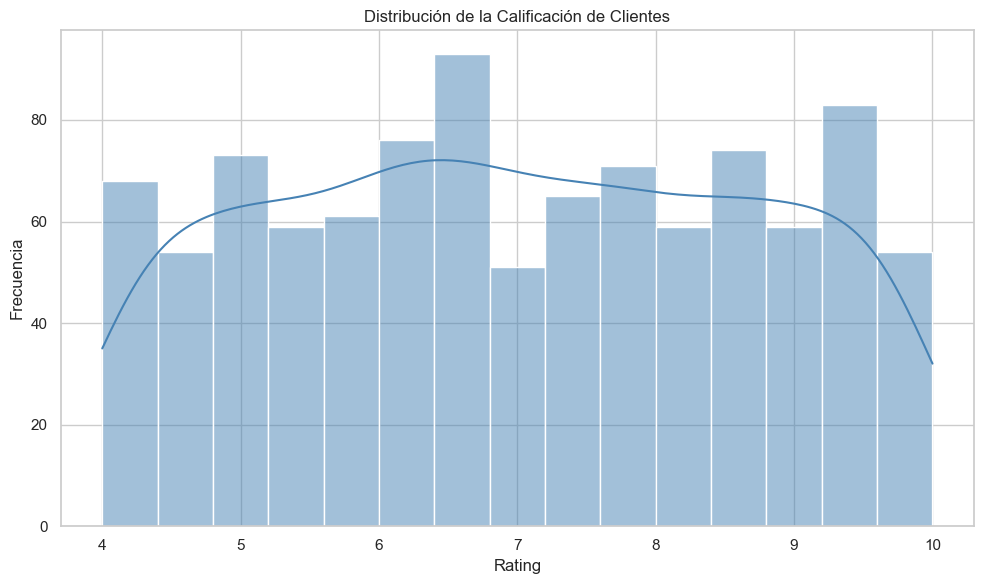

In [ ]:
# Histograma de calificaciones de clientes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=15, kde=True, color='steelblue')
plt.title('Distribución de la Calificación de Clientes')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


## Análisis 4: Comparación del Gasto por Tipo de Cliente

**Objetivo:** Comparar la distribución del gasto total entre clientes “Member” y “Normal”.

Este gráfico de caja (boxplot) permite observar si existe alguna diferencia notable en el comportamiento de compra según el tipo de cliente. Puede revelar, por ejemplo, si los miembros tienden a gastar más que los clientes normales o si hay mayor variabilidad en alguno de los grupos.


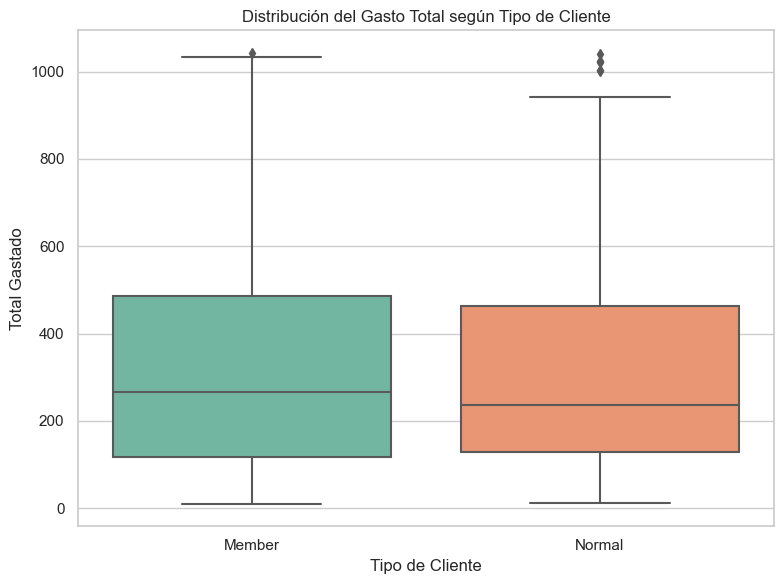

In [ ]:
# Comparar gasto total por tipo de cliente
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Customer type', y='Total', palette='Set2')
plt.title('Distribución del Gasto Total según Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Total Gastado')
plt.tight_layout()
plt.show()


## Análisis 5: Relación entre Costo y Ganancia Bruta

**Objetivo:** Visualizar la relación entre el costo de bienes vendidos (`cogs`) y el ingreso bruto (`gross income`).

Este gráfico de dispersión permite observar cómo se comportan las ganancias brutas en función del costo de los productos vendidos. La relación positiva esperada puede confirmar márgenes estables o revelar posibles irregularidades en ciertas transacciones.


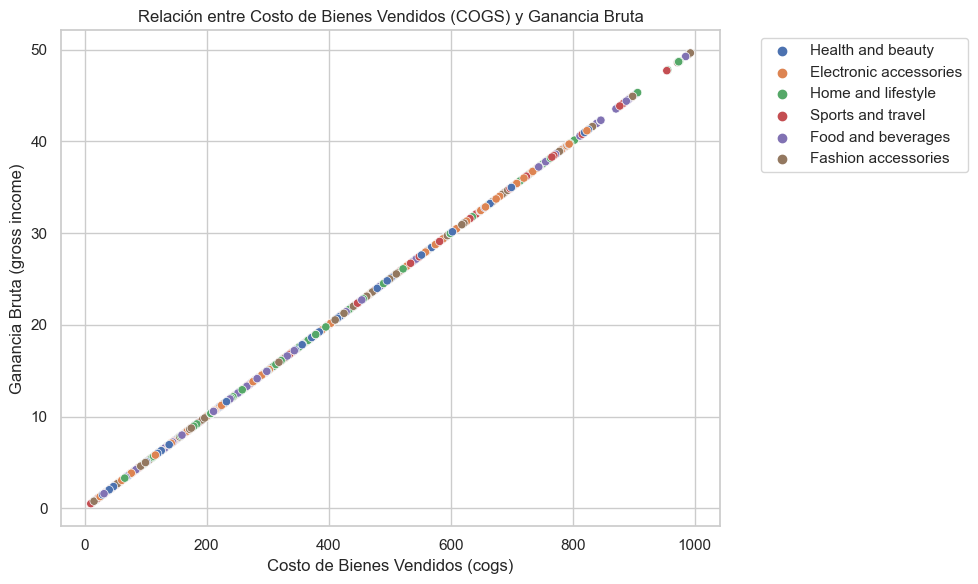

In [ ]:
# Dispersión entre cogs y gross income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cogs', y='gross income', hue='Product line')
plt.title('Relación entre Costo de Bienes Vendidos (COGS) y Ganancia Bruta')
plt.xlabel('Costo de Bienes Vendidos (cogs)')
plt.ylabel('Ganancia Bruta (gross income)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Análisis 6: Métodos de Pago Preferidos

**Objetivo:** Identificar los métodos de pago más frecuentes utilizados por los clientes.

Este gráfico permite visualizar la preferencia de los clientes por ciertos métodos de pago. Esta información es útil para la toma de decisiones sobre infraestructura de cobro, promociones asociadas a medios de pago, y convenios con proveedores de servicios financieros.


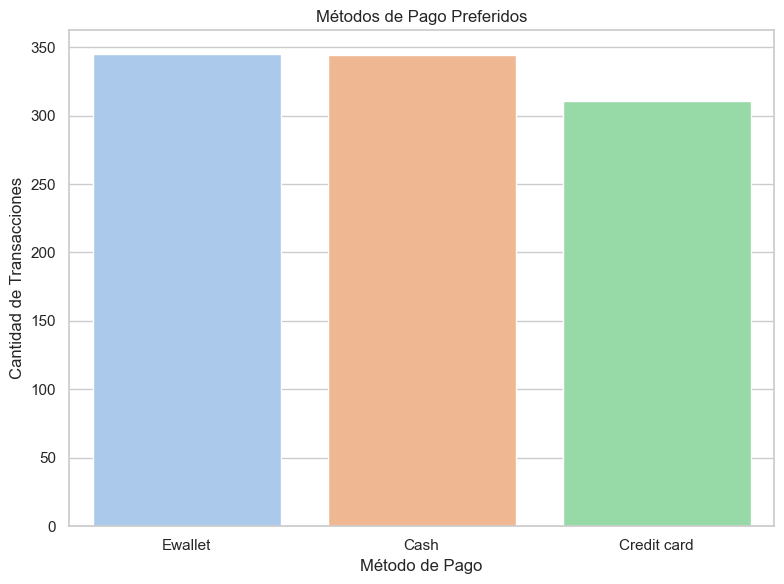

In [ ]:
# Conteo de métodos de pago
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Payment', palette='pastel', order=df['Payment'].value_counts().index)
plt.title('Métodos de Pago Preferidos')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.tight_layout()
plt.show()


## Análisis 7: Correlación entre Variables Numéricas

**Objetivo:** Explorar relaciones lineales entre variables numéricas como `Unit price`, `Quantity`, `Tax 5%`, `Total`, `cogs`, `gross income` y `Rating`.

El siguiente mapa de calor permite identificar la fuerza de las correlaciones entre las variables cuantitativas. Esto es útil para entender cuáles variables se relacionan entre sí, y para evitar multicolinealidad si se desea aplicar posteriormente un modelo predictivo.


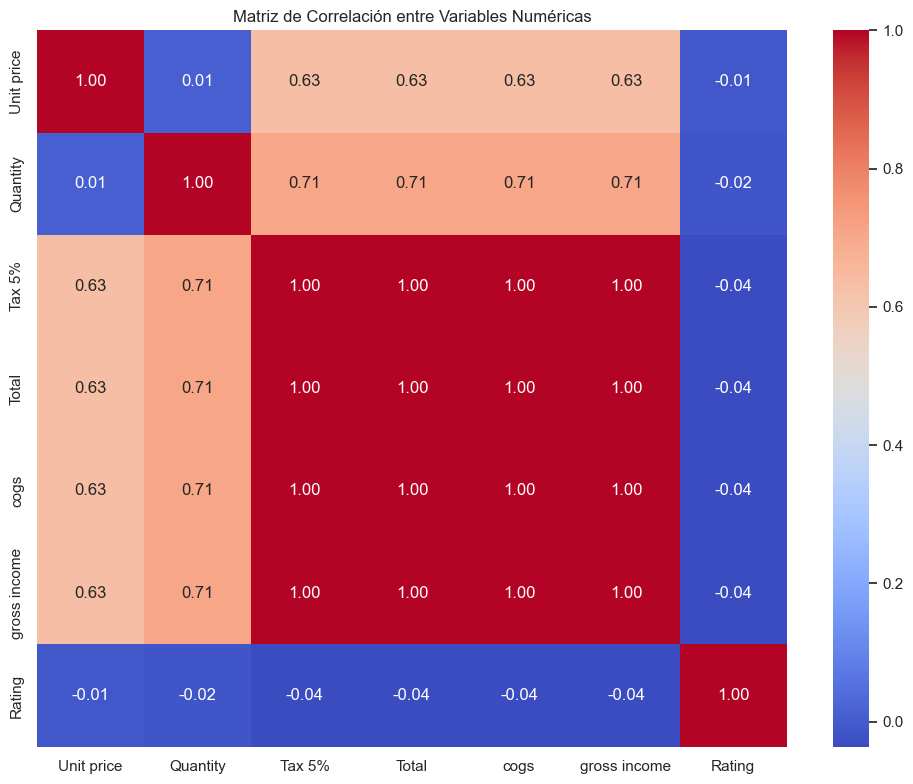

In [ ]:
# Selección de variables numéricas
variables_numericas = df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']]

# Cálculo de la matriz de correlación
correlacion = variables_numericas.corr()

# Mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


## Análisis 8: Composición del Ingreso Bruto por Sucursal y Línea de Producto

**Objetivo:** Mostrar la contribución de cada línea de producto al ingreso bruto (`gross income`) dentro de cada sucursal (`Branch`).

Este gráfico de barras apiladas permite comparar visualmente cómo se distribuye el ingreso bruto entre las distintas líneas de producto en cada sucursal. Esta información es valiosa para evaluar el desempeño regional de categorías específicas y orientar estrategias locales.


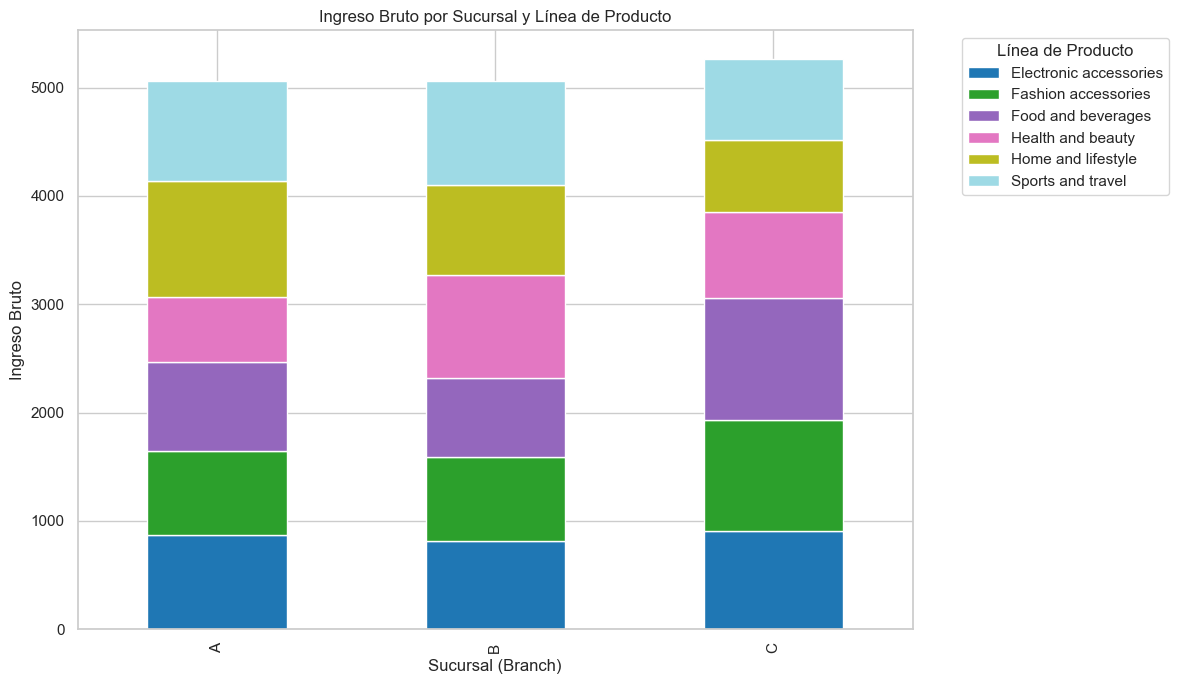

In [ ]:
# Agrupar por Branch y Product line
ingresos = df.groupby(['Branch', 'Product line'])['gross income'].sum().unstack()

# Gráfico de barras apiladas
ingresos.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Ingreso Bruto por Sucursal y Línea de Producto')
plt.xlabel('Sucursal (Branch)')
plt.ylabel('Ingreso Bruto')
plt.legend(title='Línea de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 2. Integración en un Dashboard (Streamlit)

a.  Utilizando Streamlit, integren **algunas** de sus visualizaciones y hallazgos clave en un dashboard interactivo.

b.  Asegúrense de que el dashboard sea intuitivo y bien organizado (usen títulos, texto explicativo, widgets interactivos como sliders o selectores para filtrar datos).

c.  Reflexionen sobre cómo la interactividad del dashboard mejora la experiencia del usuario y el proceso de toma de decisiones basado en los datos presentados.

**Instrucciones:**
1.  Escriban el código completo de su aplicación Streamlit en la celda de código de abajo.
2.  Copien ese código a un archivo de texto simple llamado `dashboard_tarea.py` (o el nombre que prefieran).
3.  Abran una terminal o Anaconda Prompt, naveguen a la carpeta donde guardaron el archivo.
4.  Ejecuten el comando: `streamlit run dashboard_tarea.py`
5.  Interactúen con su dashboard en el navegador.
6.  **Importante:** En la celda de Markdown siguiente, describan su dashboard, qué visualizaciones incluye, qué interacciones permite, y adjunten el código de su script de python.

In [ ]:

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

st.set_page_config(page_title="Dashboard Grupo 65", layout="wide")
st.title("📊 Análisis de Ventas - Tienda de Conveniencia")

# Cargar datos
df = pd.read_csv("supermarket_sales.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

# Filtros
with st.sidebar:
    st.header("🔎 Filtros")
    ciudad = st.selectbox("Ciudad", df["City"].unique())
    genero = st.selectbox("Género", df["Gender"].unique())
    tipo_cliente = st.selectbox("Tipo de Cliente", df["Customer type"].unique())

df_filtro = df[(df["City"] == ciudad) & (df["Gender"] == genero) & (df["Customer type"] == tipo_cliente)]

# 1. Visualización Básica de Datos
st.subheader("1️⃣ Visualización Básica de Datos")

tab1, tab2, tab3, tab4 = st.tabs(["Tendencia de Ventas", "Distribución de Ventas", "Boxplot por Producto", "Cantidad vs Total"])

with tab1:
    st.markdown("**Tendencia de Ventas Totales**")
    ventas_dia = df.groupby("Date")["Total"].sum()
    fig, ax = plt.subplots()
    ventas_dia.plot(ax=ax)
    ax.set_title("Tendencia de Ventas Totales")
    ax.set_ylabel("Total")
    st.pyplot(fig)

with tab2:
    st.markdown("**Distribución de Montos Totales de Venta**")
    fig, ax = plt.subplots()
    sns.histplot(df["Total"], bins=30, kde=False, color="skyblue", ax=ax)
    ax.set_title("Distribución de Ventas Totales")
    st.pyplot(fig)

with tab3:
    st.markdown("**Ventas por Línea de Producto (Box Plot)**")
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x="Product line", y="Total", palette="pastel", ax=ax)
    ax.set_title("Ventas por Línea de Producto")
    ax.tick_params(axis='x', rotation=45)
    st.pyplot(fig)

with tab4:
    st.markdown("**Cantidad vs Total por Tipo de Cliente**")
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x="Quantity", y="Total", hue="Customer type", palette="Set1", alpha=0.7, ax=ax)
    ax.set_title("Dispersión: Cantidad vs Total")
    st.pyplot(fig)

# 2. Gráficos Compuestos y Contextualización
st.subheader("2️⃣ Gráficos Compuestos y Contextualización")

tab5, tab6 = st.tabs(["Mapa de Calor por Sucursal y Producto", "Ventas Mensuales por Línea de Producto"])

with tab5:
    st.markdown("**Ventas por Línea de Producto y Sucursal (Heatmap)**")
    pivot = df.pivot_table(index="Product line", columns="Branch", values="Total", aggfunc="sum")
    fig, ax = plt.subplots()
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues", ax=ax)
    ax.set_title("Ventas por Línea de Producto y Sucursal")
    st.pyplot(fig)

with tab6:
    st.markdown("**Ventas Mensuales por Línea de Producto**")
    ventas_mensuales = df.groupby(["Month", "Product line"])["Total"].sum().unstack()
    fig, ax = plt.subplots(figsize=(10, 4))
    ventas_mensuales.plot(ax=ax)
    ax.set_title("Tendencia de Ventas Mensuales")
    ax.set_ylabel("Ventas")
    st.pyplot(fig)

# 3. Visualización Multivariada
st.subheader("3️⃣ Visualización Multivariada")

tab7, tab8 = st.tabs(["Matriz de Correlación", "Pair Plot"])

with tab7:
    st.markdown("**Matriz de Correlación**")
    numericas = df.select_dtypes(include="number")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(numericas.corr(), annot=True, cmap="coolwarm", ax=ax)
    ax.set_title("Matriz de Correlación entre Variables Numéricas")
    st.pyplot(fig)

with tab8:
    st.markdown("**Pair Plot: Precio, Cantidad y Total por Línea de Producto**")
    df_sample = df.sample(n=500, random_state=42)
    df_sample = df_sample[["Unit price", "Quantity", "Total", "Product line"]].dropna()
    df_sample = df_sample.astype({"Unit price": "float", "Quantity": "int", "Total": "float"})
    pair = sns.pairplot(df_sample, vars=["Unit price", "Quantity", "Total"], hue="Product line", diag_kind="hist", plot_kws={"alpha": 0.6})
    st.pyplot(pair)

# 4. Visualización 3D
st.subheader("4️⃣ Visualización 3D")

st.markdown("**Relación 3D: Cantidad, Precio Unitario y Venta Total por Línea de Producto y Rating**")

fig3d = px.scatter_3d(
    df,
    x='Quantity',
    y='Unit price',
    z='Total',
    color='Product line',
    size='Rating',
    opacity=0.7,
    title="Relación 3D: Cantidad, Precio Unitario y Total",
    labels={"Quantity": "Cantidad", "Unit price": "Precio Unitario", "Total": "Venta Total"}
)

st.plotly_chart(fig3d, use_container_width=True)

st.markdown("Este dashboard forma parte del trabajo del curso *Visualización de Información en la Era del Big Data* - Grupo 65.")


In [ ]:
# --- Describan su Dashboard (Gráficos Utilizados y Justificación de su uso) ---

''' Secciones del Dashboard :

Cada sección usa st.header() y st.markdown() para los títulos y explicaciones.

Las visualizaciones se colocan dentro de columnas (st.columns()) para una mejor organización espacial.

1. Selección de variables clave:

Texto explicativo justificando las variables elegidas.
Muestra un st.dataframe(filtered_data.head()) para ver los datos.

2. Visualización básica de datos:

Gráfico de Líneas (Ventas Totales): TotalPrice a lo largo del tiempo (Date). Agrupado por mes (resample('M')) para claridad.
Histograma (Distribución de TotalPrice): Para ver la frecuencia de diferentes montos de venta.
Box Plot (Ventas por Category): Compara la distribución de TotalPrice entre categorías.
Gráfico de Dispersión (Quantity vs. TotalPrice): Para explorar la relación entre estas dos variables. Se usa una muestra para evitar lentitud con datasets grandes.
Cada gráfico va acompañado de una breve discusión.

3. Gráficos compuestos y contextualización:

Mapa de Calor (Ventas por Category y StoreID): Muestra TotalPrice sumado, cruzando las top N categorías y tiendas para evitar saturación. Explica la elección y la comprensión profunda que aporta.
Gráfico de Líneas Múltiples (Ventas Mensuales por Category - Top 5): Compara la tendencia de ventas de las 5 categorías principales a lo largo del tiempo.

4. Visualización de datos multivariados:

Matriz de Correlación: Heatmap de seaborn para mostrar correlaciones entre variables numéricas relevantes.
Pair Plot: De seaborn, muestra relaciones bivariadas y distribuciones univariadas para un subconjunto de variables numéricas, coloreadas por Category. Se usa una muestra.
Justificación de las técnicas y cómo facilitan la interpretación.

5. Visualización en 3D:

Gráfico de Dispersión 3D (Plotly Express que el profesor del curso anterior de este diplomado nos dió como tips su utilización): Muestra Quantity, UnitPrice y TotalPrice, coloreado por Category.
Explicación de por qué 3D es apropiado y los insights que puede revelar. Plotly se elige por su interactividad (zoom, rotación).'''

In [ ]:
# --- CÓDIGO PARA dashboard_tarea_grupo_X.py ---
# (Este bloque NO se ejecuta directamente en Jupyter)

'''
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textwrap import dedent

# Configuración de la página de Streamlit
st.set_page_config(layout="wide", page_title="Análisis de Ventas - Tiendas de Conveniencia")

# --- Carga y Preparación de Datos ---
@st.cache_data # Cache para mejorar rendimiento
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)

        # Limpieza de nombres de columnas (quitar espacios extra, convertir a un formato estándar si es necesario)
        df.columns = df.columns.str.strip()
        df.rename(columns={ # Renombrar columnas para facilitar el uso y consistencia
            'Invoice ID': 'InvoiceID',
            'Customer type': 'CustomerType',
            'Product line': 'ProductLine',
            'Unit price': 'UnitPrice',
            'Tax 5%': 'Tax5Percent',
            'gross margin percentage': 'GrossMarginPercentage',
            'gross income': 'GrossIncome'
        }, inplace=True)

        # Conversión de tipos de datos
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
        if 'Time' in df.columns:
            # Combinar Date y Time en una única columna DateTime si se desea un análisis más granular de tiempo
            # Por ahora, solo convertimos Time para extraer la hora si es necesario
            df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time


        # Verificar columnas numéricas importantes
        numeric_cols_to_check = ['UnitPrice', 'Quantity', 'Tax5Percent', 'Total', 'cogs', 'GrossMarginPercentage', 'GrossIncome', 'Rating']
        for col in numeric_cols_to_check:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            else:
                st.warning(f"Advertencia: La columna numérica esperada '{col}' no se encontró en el archivo.")

        # Manejo de Nulos (ejemplo: imputar con la media para numéricos o 'Desconocido' para categóricos)
        # Esto es opcional y depende de la estrategia de análisis
        for col in df.select_dtypes(include=np.number).columns:
            if df[col].isnull().any():
                df[col].fillna(df[col].median(), inplace=True) # O .mean()

        for col in df.select_dtypes(include='object').columns:
            if df[col].isnull().any():
                df[col].fillna('Desconocido', inplace=True)

        return df

    except FileNotFoundError:
        st.error(f"Error: El archivo '{file_path}' no fue encontrado. Asegúrate de que el nombre del archivo sea correcto y esté en la misma carpeta que 'dashboard_app.py'.")
        return None
    except Exception as e:
        st.error(f"Error al cargar o procesar el archivo CSV/TXT: {e}")
        st.error("Por favor, verifica que el archivo exista, no esté corrupto y tenga el formato esperado (CSV).")
        return None

# Indicar al usuario que el archivo se llama data.csv
# El usuario debe colocar la ruta absoluta si el archivo no está junto al script.
# Por defecto, intentamos cargar "data.csv" desde la misma carpeta.
data_file_name = "data.csv"
# Para usar la ruta absoluta que el usuario indicó:
# data_file_name = "C:/Users/Rodrigo/Documents/tarea/data.csv"
# O data_file_name = "C:/Users/Rodrigo/Documents/tarea/data.csv"

data = load_data(data_file_name)


if data is not None and not data.empty:

    st.title("Análisis de Ventas y Comportamiento de Clientes")
    st.markdown("Dashboard interactivo para una cadena de tiendas de conveniencia, basado en `data.csv` entregado en clase.")

    # --- Barra lateral para filtros ---
    st.sidebar.header("Filtros Globales")

    filtered_data = data.copy() # Empezar con todos los datos, luego filtrar

    if 'Date' in filtered_data.columns and pd.api.types.is_datetime64_any_dtype(filtered_data['Date']) and not filtered_data['Date'].isnull().all():
        min_date = filtered_data['Date'].min()
        max_date = filtered_data['Date'].max()
        if pd.NaT not in [min_date, max_date] and min_date != max_date:
            date_range = st.sidebar.date_input(
                "Rango de Fechas",
                [min_date, max_date],
                min_value=min_date,
                max_value=max_date
            )
            if len(date_range) == 2:
                filtered_data = filtered_data[
                    (filtered_data['Date'] >= pd.to_datetime(date_range[0])) &
                    (filtered_data['Date'] <= pd.to_datetime(date_range[1]))
                ]
        elif min_date == max_date and pd.NaT not in [min_date, max_date]:
             st.sidebar.write(f"Datos disponibles solo para la fecha: {min_date.strftime('%Y-%m-%d')}")
        else:
            st.sidebar.write("No hay suficientes datos de fecha para un rango.")
    else:
        st.sidebar.write("Columna 'Date' no disponible o vacía para filtrar.")

    if 'ProductLine' in filtered_data.columns:
        categories = sorted(filtered_data['ProductLine'].unique())
        if categories:
            selected_categories = st.sidebar.multiselect("Líneas de Productos (Categorías)", options=categories, default=categories)
            if selected_categories:
                filtered_data = filtered_data[filtered_data['ProductLine'].isin(selected_categories)]
            else:
                filtered_data = pd.DataFrame()
    else:
        st.sidebar.write("Columna 'ProductLine' (Categoría) no disponible para filtrar.")

    if 'Branch' in filtered_data.columns:
        stores = sorted(filtered_data['Branch'].unique())
        if stores:
            selected_stores = st.sidebar.multiselect("Sucursales (Branch)", options=stores, default=stores)
            if selected_stores:
                filtered_data = filtered_data[filtered_data['Branch'].isin(selected_stores)]
            else:
                 filtered_data = pd.DataFrame()
    else:
        st.sidebar.write("Columna 'Branch' (Tienda) no disponible para filtrar.")


    # --- 1. Selección de variables clave ---
    st.header("1. Selección de Variables Clave")
    st.markdown(dedent("""
        Tras analizar el dataset `data.csv`, hemos identificado las siguientes variables como las más relevantes:

        * **`Date` (Fecha):** Para análisis de tendencias temporales y estacionalidad.
        * **`Time` (Hora):** Para identificar picos de actividad durante el día.
        * **`Total` (Venta Total):** Métrica clave de ingresos por transacción.
        * **`ProductLine` (Línea de Producto):** Actúa como la categoría principal del producto.
        * **`Quantity` (Cantidad Vendida):** Volumen de productos.
        * **`UnitPrice` (Precio Unitario):** Precio por unidad de producto.
        * **`Branch` (Sucursal):** Para comparar rendimiento entre sucursales (A, B, C).
        * **`City` (Ciudad):** Contexto geográfico de la sucursal.
        * **`CustomerType` (Tipo de Cliente):** Para segmentación (Member, Normal).
        * **`Gender` (Género):** Otra variable de segmentación de clientes.
        * **`Payment` (Método de Pago):** Preferencias de pago de los clientes.
        * **`Rating` (Calificación):** Métrica de satisfacción del cliente.
        * **`cogs` (Costo de Bienes Vendidos):** Para calcular rentabilidad.
        * **`GrossIncome` (Ingreso Bruto):** Representa el impuesto de la transacción. (Nota: En el dataset, esta columna es igual a `Tax5Percent`).

        **Justificación:** Estas variables permiten analizar el rendimiento de ventas (`Total`, `Quantity`), la popularidad de productos (`ProductLine`), el comportamiento del cliente (`CustomerType`, `Gender`, `Rating`, `Payment`), el rendimiento por sucursal (`Branch`, `City`) y las tendencias temporales (`Date`, `Time`). Son cruciales para diseñar estrategias de marketing, optimizar inventarios y mejorar la experiencia del cliente.
    """))
    st.subheader("Vista Previa de Datos Filtrados (de data.csv)")
    if not filtered_data.empty:
        st.dataframe(filtered_data.head())
    else:
        st.warning("No hay datos para mostrar con los filtros seleccionados. Por favor, ajusta los filtros o verifica el archivo de datos.")


    # --- 2. Visualización básica de datos ---
    if not filtered_data.empty:
        st.header("2. Visualización Básica de Datos")
        st.markdown("Exploración inicial de la distribución y relaciones entre variables seleccionadas.")

        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Tendencia de Ventas Totales ('Total')")
            if 'Date' in filtered_data.columns and not filtered_data['Date'].isnull().all() and not filtered_data.empty:
                sales_over_time = filtered_data.set_index('Date')['Total'].resample('M').sum()
                if not sales_over_time.empty:
                    fig_line, ax_line = plt.subplots()
                    sales_over_time.plot(kind='line', ax=ax_line, marker='o')
                    ax_line.set_title("Ventas Totales Mensuales")
                    ax_line.set_xlabel("Mes")
                    ax_line.set_ylabel("Ventas ('Total')")
                    plt.xticks(rotation=45)
                    st.pyplot(fig_line)
                    st.markdown("*Revela:* Patrones estacionales, crecimiento o declive en ventas a lo largo del tiempo.")
                else:
                    st.markdown("No hay datos agregados de ventas para graficar.")
            else:
                st.markdown("Columna 'Date' no válida o datos insuficientes para el gráfico de líneas de ventas.")

            st.subheader("Distribución de Montos Totales de Venta ('Total')")
            if 'Total' in filtered_data.columns and not filtered_data.empty:
                fig_hist, ax_hist = plt.subplots()
                sns.histplot(filtered_data['Total'], kde=True, ax=ax_hist)
                ax_hist.set_title("Histograma de Montos Totales de Venta")
                ax_hist.set_xlabel("Monto Total de Venta ('Total')")
                ax_hist.set_ylabel("Frecuencia")
                st.pyplot(fig_hist)
                st.markdown("*Revela:* La distribución de los montos de las transacciones.")

        with col2:
            st.subheader("Ventas ('Total') por Línea de Producto (Box Plot)")
            if 'ProductLine' in filtered_data.columns and 'Total' in filtered_data.columns and not filtered_data.empty:
                fig_box, ax_box = plt.subplots(figsize=(10,6))
                sns.boxplot(y='ProductLine', x='Total', data=filtered_data, ax=ax_box, orient='h')
                ax_box.set_title("Distribución de Ventas por Línea de Producto")
                ax_box.set_xlabel("Monto Total de Venta ('Total')")
                ax_box.set_ylabel("Línea de Producto")
                st.pyplot(fig_box)
                st.markdown("*Revela:* Comparación del rendimiento de ventas entre líneas de producto.")
            else:
                st.markdown("Columnas 'ProductLine' o 'Total' no disponibles/válidas para el box plot.")

            if 'Quantity' in filtered_data.columns and 'Total' in filtered_data.columns and not filtered_data.empty:
                st.subheader("Relación Cantidad vs. Venta Total (Dispersión)")
                sample_df_scatter = filtered_data.sample(n=min(1000, len(filtered_data)))
                if not sample_df_scatter.empty:
                    fig_scatter, ax_scatter = plt.subplots()
                    sns.scatterplot(x='Quantity', y='Total', data=sample_df_scatter, ax=ax_scatter, alpha=0.5, hue='CustomerType' if 'CustomerType' in sample_df_scatter else None)
                    ax_scatter.set_title("Dispersión: Cantidad vs. Venta Total")
                    ax_scatter.set_xlabel("Cantidad Vendida ('Quantity')")
                    ax_scatter.set_ylabel("Monto Total de Venta ('Total')")
                    if 'CustomerType' in sample_df_scatter: ax_scatter.legend(title='Tipo Cliente')
                    st.pyplot(fig_scatter)
                    st.markdown("*Revela:* Correlación entre cantidad y venta total, posiblemente diferenciada por tipo de cliente.")
            else:
                st.markdown("Columnas 'Quantity' o 'Total' no disponibles/válidas para el gráfico de dispersión.")

    # --- 3. Gráficos compuestos y contextualización ---
    if not filtered_data.empty:
        st.header("3. Gráficos Compuestos y Contextualización")
        st.markdown("Visualizaciones que combinan múltiples variables para una comprensión más profunda.")

        col3, col4 = st.columns(2)

        with col3:
            st.subheader("Ventas ('Total') por Línea de Producto y Sucursal ('Branch')")
            if 'ProductLine' in filtered_data.columns and 'Branch' in filtered_data.columns and 'Total' in filtered_data.columns and not filtered_data.empty:
                pivot_sales = filtered_data.groupby(['ProductLine', 'Branch'])['Total'].sum().unstack(fill_value=0)
                if not pivot_sales.empty:
                    fig_heatmap_cat_store, ax_heatmap_cat_store = plt.subplots(figsize=(12, 8))
                    sns.heatmap(pivot_sales, annot=True, fmt=".0f", cmap="YlGnBu", ax=ax_heatmap_cat_store)
                    ax_heatmap_cat_store.set_title("Mapa de Calor: Ventas por Línea de Producto y Sucursal")
                    ax_heatmap_cat_store.set_xlabel("Sucursal ('Branch')")
                    ax_heatmap_cat_store.set_ylabel("Línea de Producto")
                    plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
                    st.pyplot(fig_heatmap_cat_store)
                    st.markdown(dedent("""
                        *Comprensión más profunda:* Muestra qué líneas de producto son más fuertes en qué sucursales.
                        *Elección:* Un mapa de calor es excelente para esta comparación bidimensional.
                    """))
                else:
                    st.markdown("No hay datos suficientes para generar el mapa de calor de ventas por Línea de Producto y Sucursal.")
            else:
                st.markdown("Columnas 'ProductLine', 'Branch' o 'Total' no disponibles/válidas.")

        with col4:
            st.subheader("Ventas Mensuales por Línea de Producto (Top)")
            if 'Date' in filtered_data.columns and not filtered_data['Date'].isnull().all() and                'ProductLine' in filtered_data.columns and 'Total' in filtered_data.columns and not filtered_data.empty:

                top_n_categories = filtered_data.groupby('ProductLine')['Total'].sum().nlargest(5).index
                if not top_n_categories.empty:
                    sales_by_month_category_df = filtered_data[filtered_data['ProductLine'].isin(top_n_categories)]
                    if not sales_by_month_category_df.empty:
                        sales_by_month_category = sales_by_month_category_df.groupby([pd.Grouper(key='Date', freq='M'), 'ProductLine'])['Total'].sum().unstack(fill_value=0)
                        if not sales_by_month_category.empty:
                            fig_line_cat_month, ax_line_cat_month = plt.subplots(figsize=(12, 6))
                            sales_by_month_category.plot(kind='line', marker='o', ax=ax_line_cat_month)
                            ax_line_cat_month.set_title("Tendencia de Ventas Mensuales por Línea de Producto (Top 5)")
                            ax_line_cat_month.set_xlabel("Mes")
                            ax_line_cat_month.set_ylabel("Ventas ('Total')")
                            ax_line_cat_month.legend(title='Línea de Producto')
                            plt.xticks(rotation=45)
                            st.pyplot(fig_line_cat_month)
                            st.markdown(dedent("""
                                *Comprensión más profunda:* Compara la tendencia de ventas de las líneas de producto más importantes.
                                *Elección:* Ideal para comparar tendencias de series temporales.
                            """))
                        else:
                             st.markdown("No hay datos de ventas mensuales agregados para las líneas de producto top.")
                    else:
                        st.markdown("No hay datos para las líneas de producto top seleccionadas.")
                else:
                    st.markdown("No se pudieron determinar las líneas de producto top.")
            else:
                st.markdown("Columnas 'Date', 'ProductLine' o 'Total' no disponibles/válidas.")

    # --- 4. Visualización de datos multivariados y de alta dimensionalidad ---
    if not filtered_data.empty:
        st.header("4. Visualización de Datos Multivariados")
        st.markdown("Técnicas para interpretar patrones complejos con múltiples variables.")

        col5, col6 = st.columns(2)

        with col5:
            st.subheader("Matriz de Correlación (Variables Numéricas)")
            # Seleccionar solo columnas que son inherentemente numéricas y relevantes para correlación
            numerical_cols_for_corr = ['UnitPrice', 'Quantity', 'Tax5Percent', 'Total', 'cogs', 'GrossMarginPercentage', 'Rating']
            # Filtrar solo las columnas que existen en el dataframe
            existing_numerical_cols = [col for col in numerical_cols_for_corr if col in filtered_data.columns and filtered_data[col].nunique() > 1]

            if len(existing_numerical_cols) > 1:
                corr_matrix = filtered_data[existing_numerical_cols].corr()
                fig_corr, ax_corr = plt.subplots(figsize=(10,7))
                sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax_corr)
                ax_corr.set_title("Matriz de Correlación")
                plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
                st.pyplot(fig_corr)
                st.markdown(dedent("""
                    *Justificación:* Entender relaciones lineales entre variables numéricas clave.
                    *Facilita:* Identificar variables que se mueven juntas.
                """))
            else:
                st.markdown("No hay suficientes variables numéricas (>1) para generar una matriz de correlación.")

        with col6:
            st.subheader("Pair Plot (Subconjunto de Variables)")
            if 'ProductLine' in filtered_data.columns and len(existing_numerical_cols) >= 2 :
                vars_for_pairplot = [col for col in ['UnitPrice', 'Quantity', 'Total', 'Rating'] if col in existing_numerical_cols][:3]

                if len(vars_for_pairplot) >=2 : # Pairplot necesita al menos 2 variables
                    sample_size_pairplot = min(500, len(filtered_data))
                    pairplot_df_sample = filtered_data[vars_for_pairplot + ['ProductLine']].dropna().sample(n=sample_size_pairplot, replace=True if sample_size_pairplot > len(filtered_data.dropna()) else False)

                    if not pairplot_df_sample.empty and len(pairplot_df_sample.columns) > 1:
                        st.markdown(f"Mostrando Pair Plot para: {', '.join(vars_for_pairplot)} coloreado por 'ProductLine'. (Muestra de hasta {sample_size_pairplot} puntos)")
                        try:
                            fig_pairplot = sns.pairplot(pairplot_df_sample, hue='ProductLine', diag_kind='kde', vars=vars_for_pairplot)
                            st.pyplot(fig_pairplot)
                            st.markdown(dedent("""
                                *Justificación:* Muestra relaciones bivariadas y distribuciones, coloreadas por Línea de Producto.
                                *Facilita:* Detección visual de patrones y agrupaciones.
                            """))
                        except Exception as e:
                            st.warning(f"No se pudo generar el Pair Plot: {e}. Puede ser por falta de datos o demasiadas categorías en la muestra.")
                    else:
                        st.markdown("No hay suficientes datos o variables para el Pair Plot con los filtros y muestra actuales.")
                else:
                    st.markdown("No hay suficientes variables numéricas seleccionadas para el Pair Plot.")
            else:
                st.markdown("Se necesitan 'ProductLine' y al menos 2 variables numéricas para el Pair Plot.")


    # --- 5. Visualización en 3D ---
    if not filtered_data.empty:
        st.header("5. Visualización en 3D")
        st.markdown("Representación tridimensional para insights adicionales.")

        cols_for_3d = ['Quantity', 'UnitPrice', 'Total', 'ProductLine', 'Rating']
        if all(col in filtered_data.columns for col in cols_for_3d):
            st.subheader("Relación 3D: Cantidad, Precio Unitario y Venta Total por Rating/Categoría")

            sample_df_3d = filtered_data.sample(n=min(1000, len(filtered_data)))

            if not sample_df_3d.empty:
                fig_3d = px.scatter_3d(
                    sample_df_3d,
                    x='Quantity',
                    y='UnitPrice',
                    z='Total',
                    color='ProductLine', # O 'Rating' si se prefiere
                    size='Rating',      # Usar Rating para el tamaño del punto puede ser interesante
                    opacity=0.7,
                    title="Cantidad vs. Precio Unitario vs. Venta Total",
                    labels={'Quantity': 'Cantidad', 'UnitPrice': 'Precio Unitario', 'Total': 'Venta Total'}
                )
                fig_3d.update_layout(margin=dict(l=0, r=0, b=0, t=40))
                st.plotly_chart(fig_3d, use_container_width=True)

                st.markdown(dedent("""
                    *Variables elegidas:* `Quantity`, `UnitPrice`, y `Total`, coloreadas por `ProductLine` y tamaño por `Rating`.
                    *Por qué 3D es apropiado:* Permite observar la interrelación de estas métricas de ventas.
                    *Insights:* Podría revelar cómo diferentes líneas de producto se posicionan en términos de volumen, precio y valor total, y cómo la calificación se relaciona con esto.
                """))
            else:
                 st.markdown("No hay datos suficientes en la muestra para la visualización 3D.")
        else:
            st.markdown("Se requieren las columnas 'Quantity', 'UnitPrice', 'Total', 'ProductLine' y 'Rating' para la visualización 3D.")

    # --- 6. Integración en un dashboard ---
    st.header("6. Reflexión sobre el Dashboard Interactivo")
    st.markdown(dedent("""
        Este dashboard ha sido construido utilizando Streamlit, integrando todas las visualizaciones y hallazgos presentados, adaptados al dataset `data.csv`.

        **Organización e Intuitividad:**
        El dashboard sigue una progresión lógica de análisis, desde la selección de variables hasta visualizaciones avanzadas. Los filtros en la barra lateral permiten una exploración intuitiva.

        **Mejora de la Experiencia del Usuario y Toma de Decisiones:**
        La interactividad (filtros, gráficos dinámicos) transforma los datos en conocimiento accionable, permitiendo a los usuarios explorar, descubrir patrones y tomar decisiones informadas sobre estrategias de marketing, gestión de inventario y satisfacción del cliente.
    """))

elif data is None: # Error en la carga de datos
    st.error("El dashboard no puede continuar porque los datos no se cargaron correctamente. Verifica el archivo y la ruta especificada.")
else: # Dataframe vacío después de filtros
    st.warning("El archivo de datos se cargó pero está vacío o los filtros actuales no devuelven resultados. Por favor, verifica el archivo de datos o ajusta los filtros.")


# Footer
st.sidebar.markdown("---")
st.sidebar.info("Dashboard adaptado al dataset con datos de una cadena de tiendas de conveniencia.")

 '''

# 3. Deployment

El dashboard desplegado permite visualizar datos con filtros por ciudad, género y tipo de cliente, integrando visualizaciones interactivas en 2D y 3D. Está organizado por secciones para una navegación intuitiva.

**Enlace:** [https://dashboardgrupo65-chaafp6x3kdppzb5dzxmda.streamlit.app/](https://dashboardgrupo65-chaafp6x3kdppzb5dzxmda.streamlit.app/)

En el caso que no hayan podido deployar:

In [ ]:
'''
No hubieron mayores problemas siguiendo las instrucciones en clase del profesor.
'''

En el caso que hayan podido deployar:

In [ ]:
'''
Poner aquí la url de su dashboard en el servidor de Streamlit.
https://dashboard-grupo51-bsfwnew3y6jojbxivwjesw.streamlit.app/
'''

# 4. Conclusiones Generales

Reflexionen sobre el proceso de análisis y visualización. ¿Qué aprendieron sobre los datos de la tienda? ¿Qué limitaciones encontraron en los datos o en las técnicas de visualización? ¿Qué recomendaciones (basadas en los datos) podrían darle a la cadena de tiendas?

In [ ]:
'''
Escriban acá su reflexión sobre el Dashboard.
'''

# 5. Referencias

**Referencias:**
- Dataset: Supermarket Sales Dataset - Kaggle [https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales]
- Bibliotecas utilizadas: pandas, matplotlib, seaborn, plotly, streamlit
- Documentación oficial:  
  - [https://docs.streamlit.io/](https://docs.streamlit.io/)  
  - [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
  - [https://plotly.com/python/](https://plotly.com/python/)

In [ ]:
'''
Escriban aquí las referencias.
'''

## NOTA FINAL:
### Asegúrense de sólo subir el jupyter notebook a la plataforma, con un formato del tipo: "Trabajo_Grupo_51.ipynb".
### No es necesario incluir el archivo .py del dashboard, pero sí el código dentro de este cuaderno en el apartado correspondiente.